## Notebook Setup

In [80]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno    
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [81]:
# Loading the dataset
df=pd.read_csv('Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv')

In [82]:
# Displaying the first five rows of the dataset
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [83]:
# Converting 'Month' to datetime object and setting it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [84]:
df.sort_index(inplace=True)

In [116]:
df.head()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2019-07-08,13078,9442,422,18848,0,0.0
2019-07-09,13835,10550,455,19862,0,1.0
2019-07-10,13856,10066,421,19502,0,1.0
2019-07-11,12776,9536,421,19204,0,0.0
2019-07-12,12614,9413,344,18057,0,1.0


In [85]:
# Getting the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1918 entries, 2019-07-01 to 2024-09-29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Local Route   1918 non-null   int64  
 1   Light Rail    1918 non-null   int64  
 2   Peak Service  1918 non-null   int64  
 3   Rapid Route   1918 non-null   int64  
 4   School        1918 non-null   int64  
 5   Other         1898 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 104.9 KB


In [86]:
# Displaying the last five rows of the dataset
df.tail()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2024-09-25,21,0,1,10,8,NaN
2024-09-26,9,0,0,0,2,NaN
2024-09-27,6,0,0,13,0,NaN
2024-09-28,1,0,0,4,0,NaN
2024-09-29,1,0,0,3,0,NaN


In [87]:
# Displaying the statistical summary of the dataset
df.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1898.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.390411
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.746882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


Handling Missing values

In [88]:
# Checking for missing values in the dataset
df.isnull().sum()   

Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64

<Axes: >

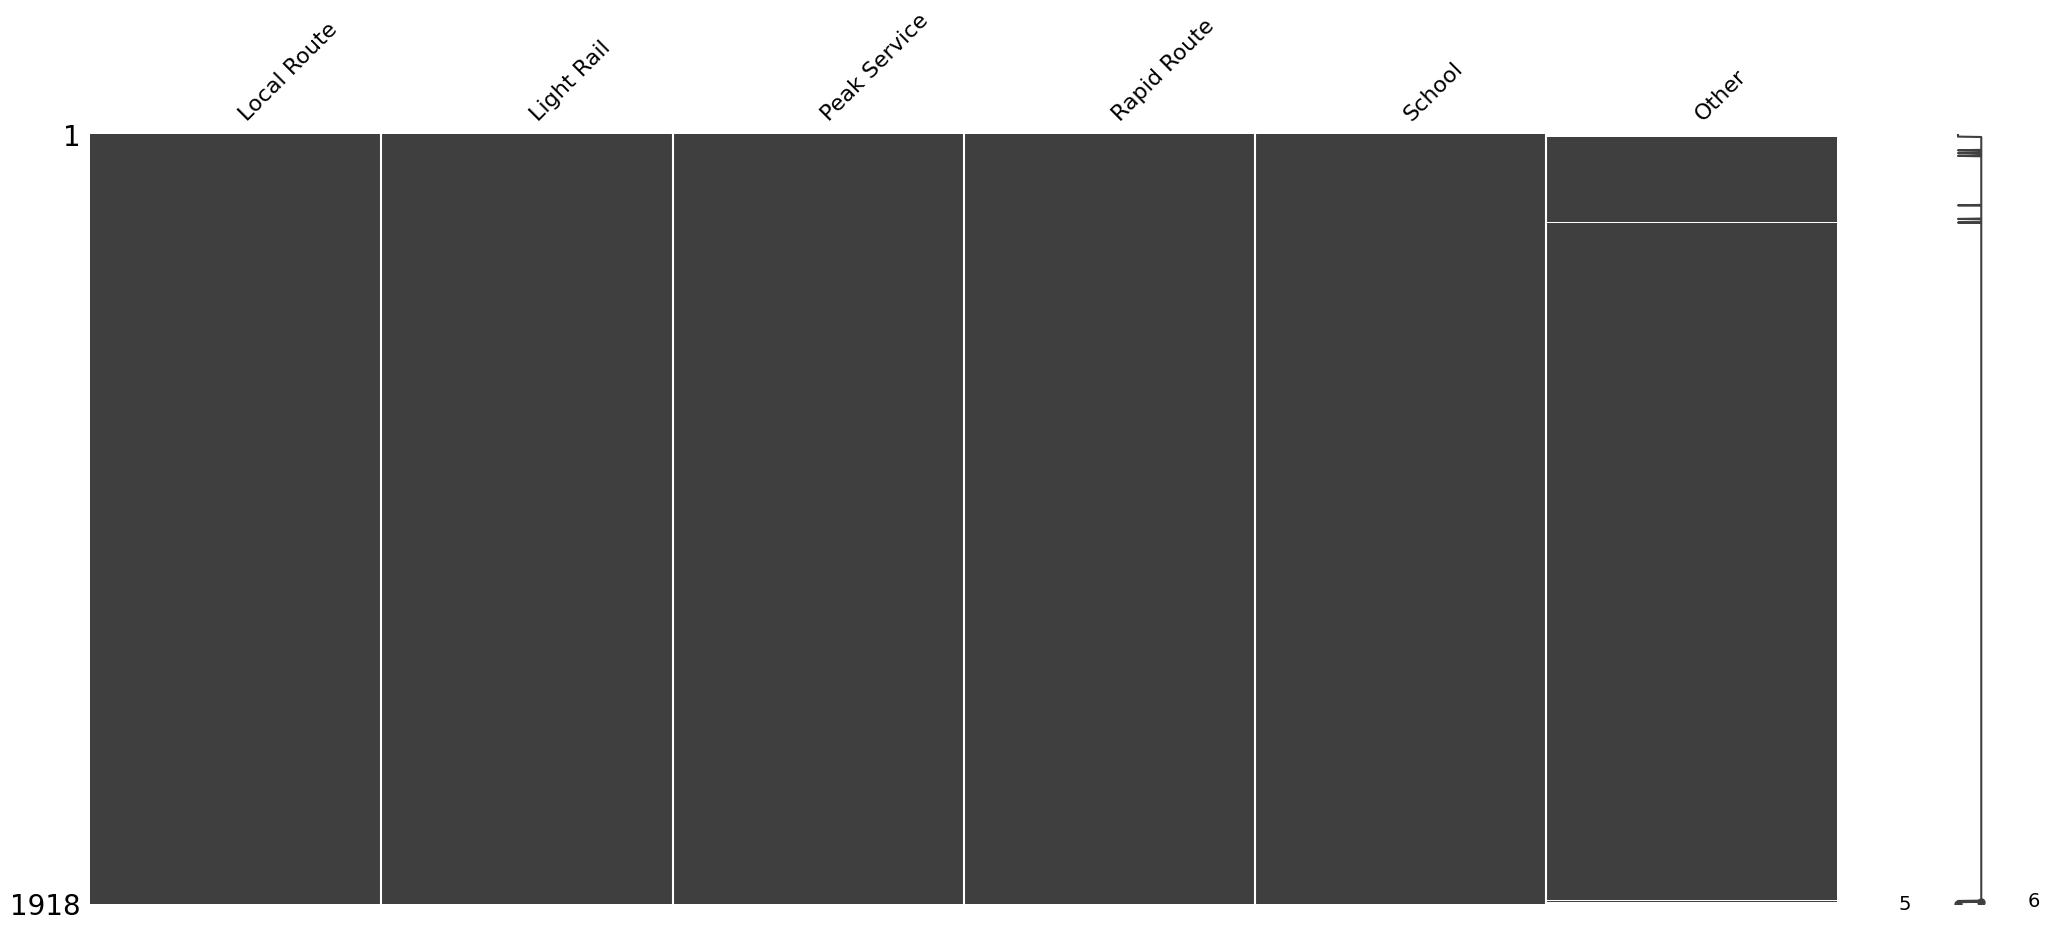

In [89]:
# Visualizing the missing values using missingno
msno.matrix(df)

In [90]:
# Dropping the missing values
df=df.dropna()

In [91]:
# Checking for missing values again
df.isnull().sum()

Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
Other           0
dtype: int64

<Axes: >

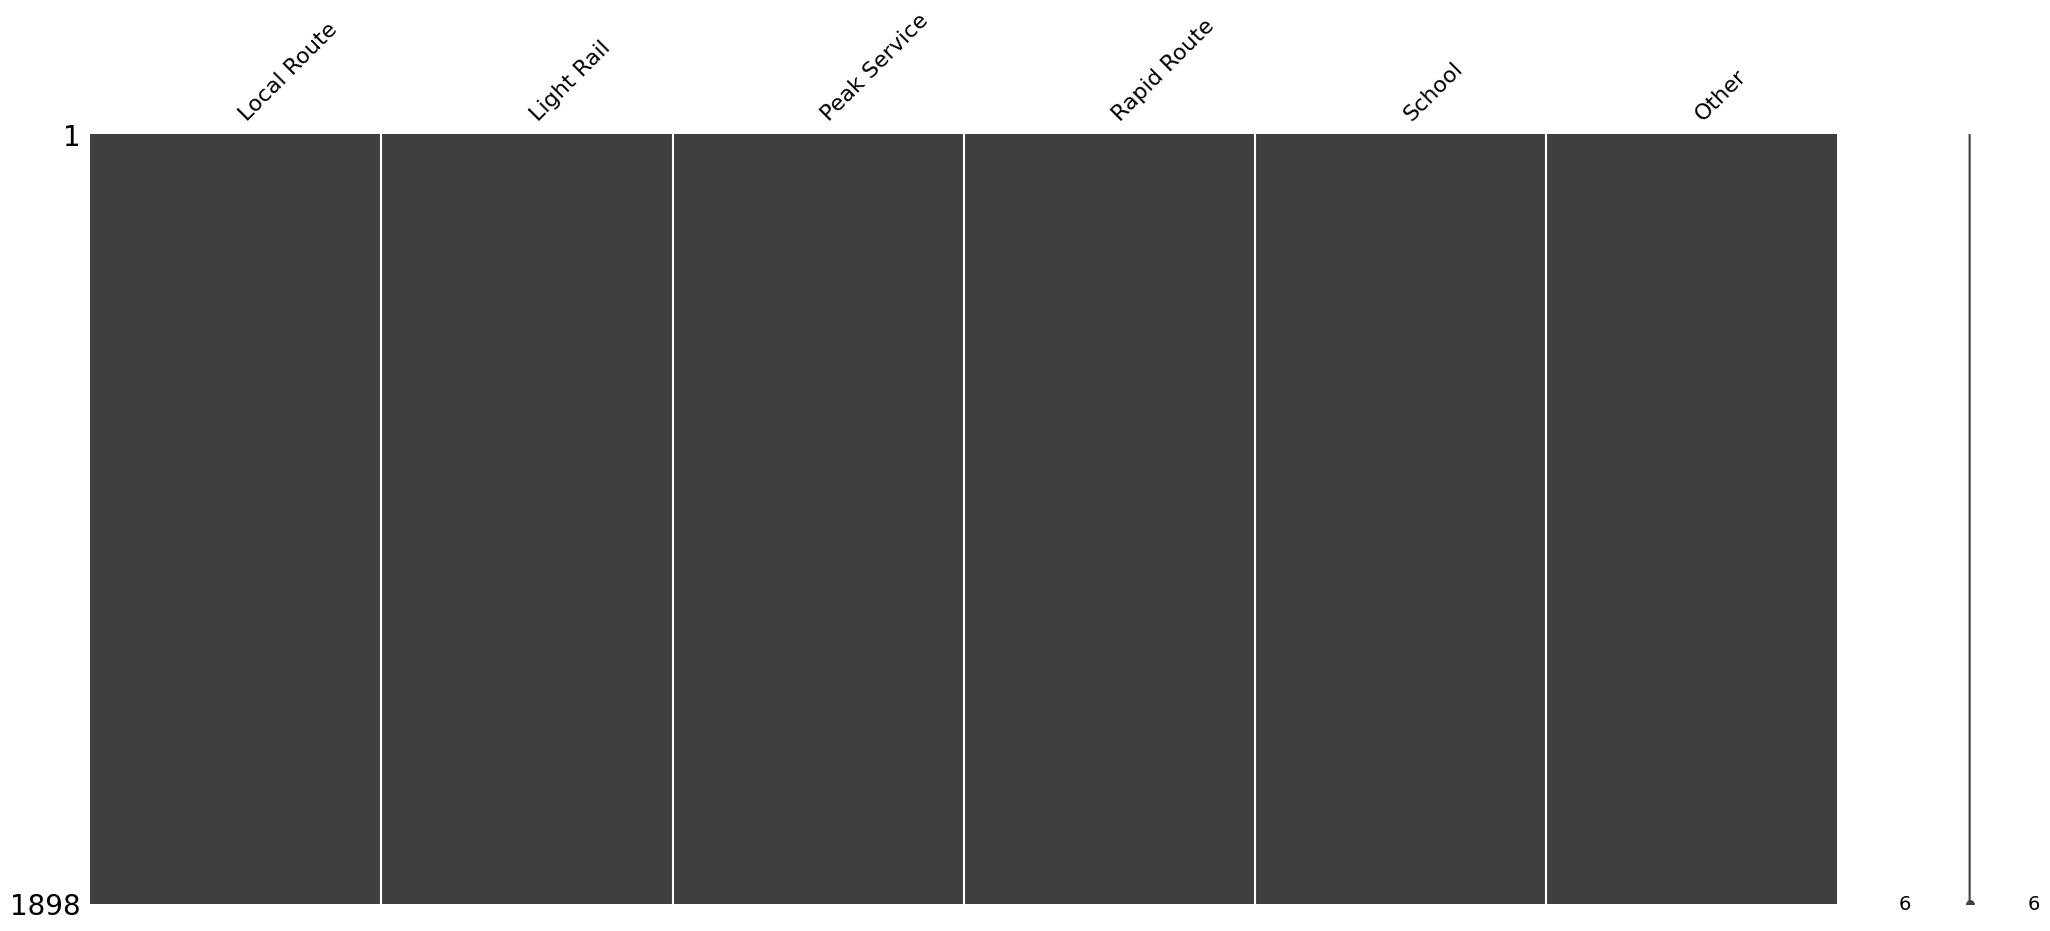

In [92]:
# Visualizing the missing values in the dataset again
msno.matrix(df)

In [93]:
df.tail()   

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2024-09-18,16776,11300,383,20242,4401,72.0
2024-09-19,16129,10469,288,19650,4557,93.0
2024-09-20,485,2537,0,440,37,0.0
2024-09-22,21,577,0,49,0,0.0
2024-09-23,56,1938,0,67,10,0.0


Handling Outliers

In [94]:
df.shape

(1898, 6)

Text(0.5, 1.0, 'Boxplot of Local Route')

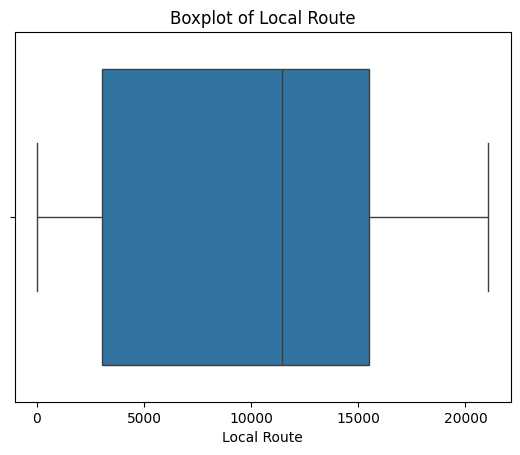

In [95]:
sns.boxplot(x=df['Local Route'])
plt.title('Boxplot of Local Route')

Text(0.5, 1.0, 'Boxplot of Light Rail')

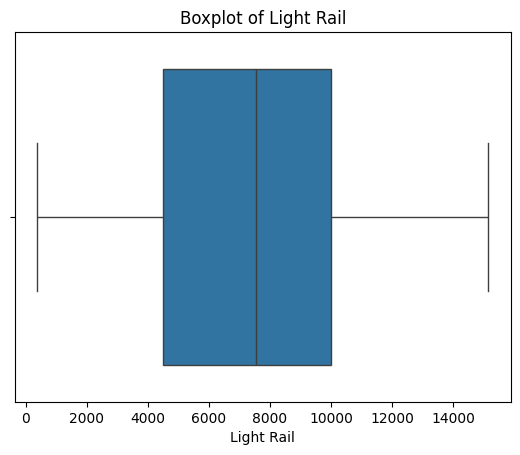

In [96]:
sns.boxplot(x=df['Light Rail'])
plt.title('Boxplot of Light Rail')

Text(0.5, 1.0, 'Boxplot of Peak Service')

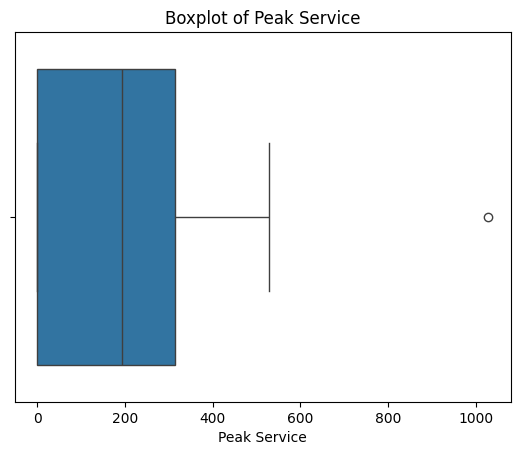

In [97]:
sns.boxplot(x=df['Peak Service'])
plt.title('Boxplot of Peak Service')

In [98]:
# Calculate IQR
Q1 = df['Peak Service'].quantile(0.25)
Q3 = df['Peak Service'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['Peak Service'] >= lower_bound) & (df['Peak Service'] <= upper_bound)]

print("Current size:", df.shape)


Current size: (1897, 6)


Text(0.5, 1.0, 'Boxplot of Peak Service')

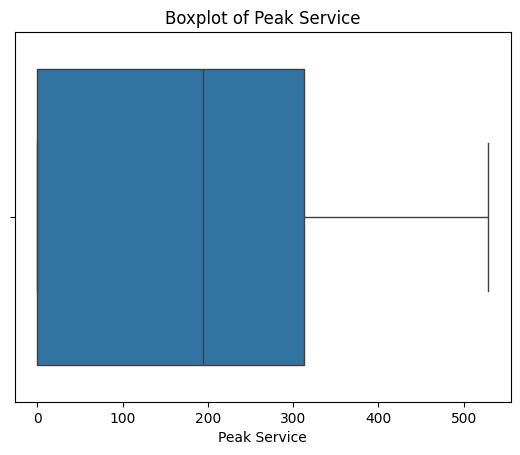

In [99]:
sns.boxplot(x=df['Peak Service'])
plt.title('Boxplot of Peak Service')

Text(0.5, 1.0, 'Boxplot of Rapid Route')

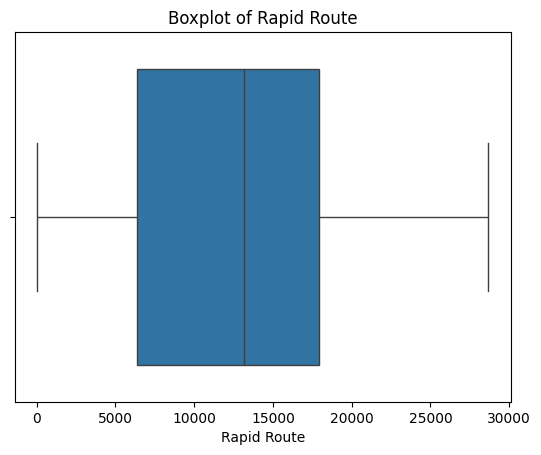

In [100]:
sns.boxplot(x=df['Rapid Route'])
plt.title('Boxplot of Rapid Route')

Text(0.5, 1.0, 'Boxplot of School')

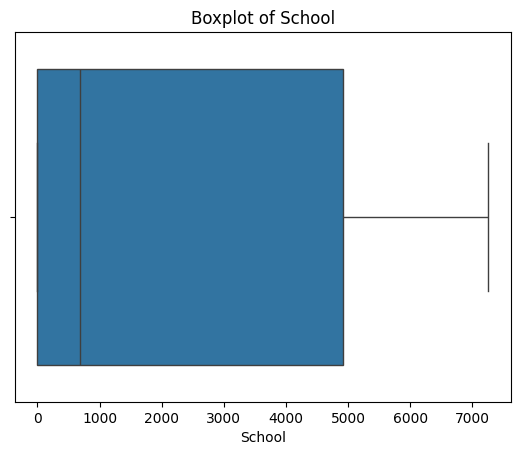

In [101]:
sns.boxplot(x=df['School'])
plt.title('Boxplot of School')

Text(0.5, 1.0, 'Boxplot of Other')

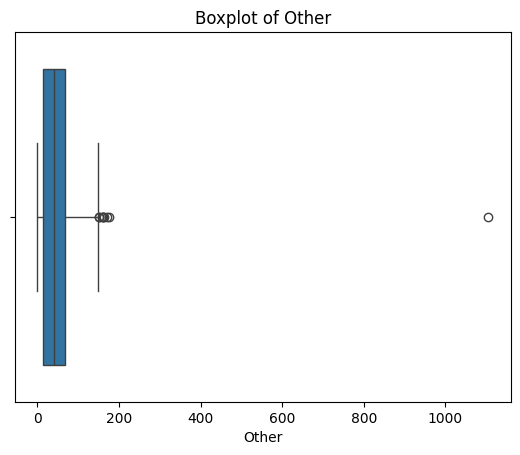

In [102]:
sns.boxplot(x=df['Other'])
plt.title('Boxplot of Other')

In [103]:
# Calculate IQR
Q1 = df['Other'].quantile(0.25)
Q3 = df['Other'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['Other'] >= lower_bound) & (df['Other'] <= upper_bound)]


print("Current size:", df.shape)


Current size: (1888, 6)


Text(0.5, 1.0, 'Boxplot of Other')

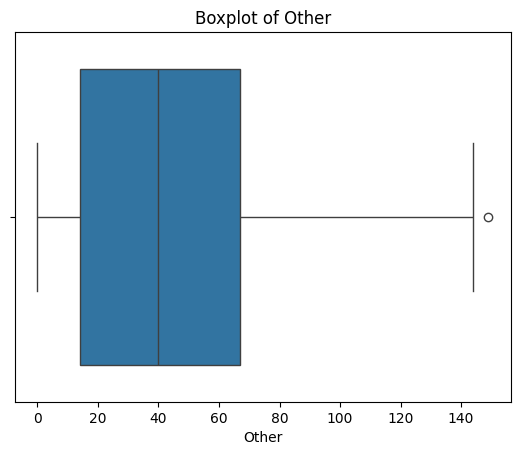

In [104]:
sns.boxplot(x=df['Other'])
plt.title('Boxplot of Other')

Exploring Time Series Component

In [105]:
df.head()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2019-07-08,13078,9442,422,18848,0,0.0
2019-07-09,13835,10550,455,19862,0,1.0
2019-07-10,13856,10066,421,19502,0,1.0
2019-07-11,12776,9536,421,19204,0,0.0
2019-07-12,12614,9413,344,18057,0,1.0


In [120]:
df.tail()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2024-09-18,16776,11300,383,20242,4401,72.0
2024-09-19,16129,10469,288,19650,4557,93.0
2024-09-20,485,2537,0,440,37,0.0
2024-09-22,21,577,0,49,0,0.0
2024-09-23,56,1938,0,67,10,0.0


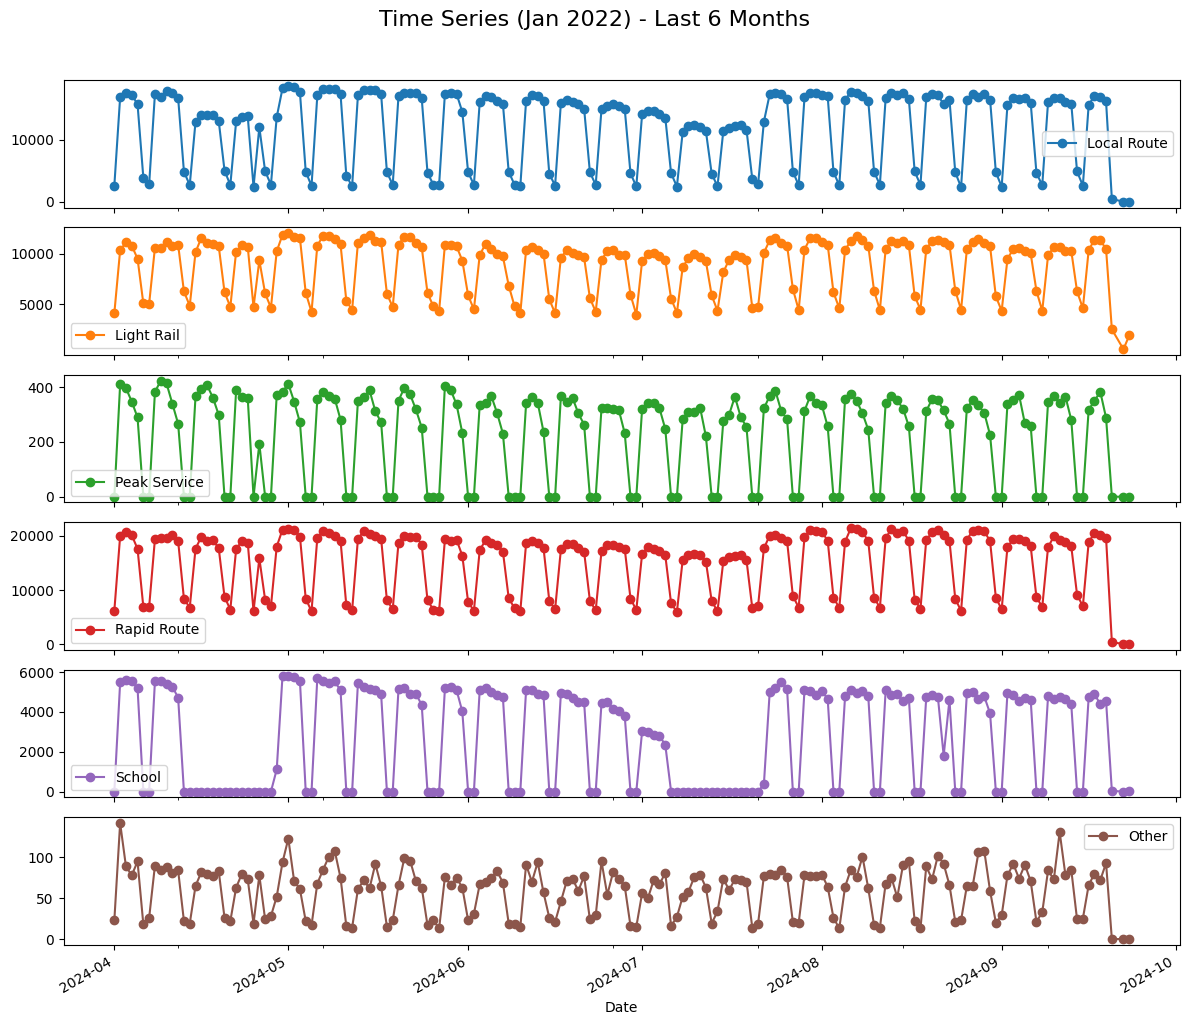

In [154]:
# Filter data for the desired period
df_period = df.loc['2023-01-01':]  # Only 2023 onwards
df_period = df.last('6M')          # Last 6 months dynamically

# Plot each column in a separate subplot
df_period.plot(subplots=True, figsize=(12, 10), linewidth=1.5, sharex=True, marker='o')

# Add title and formatting
plt.suptitle('Time Series (Jan 2022) - Last 6 Months', fontsize=16, y=1.02)
plt.xlabel('Date')
plt.tight_layout()
plt.show()

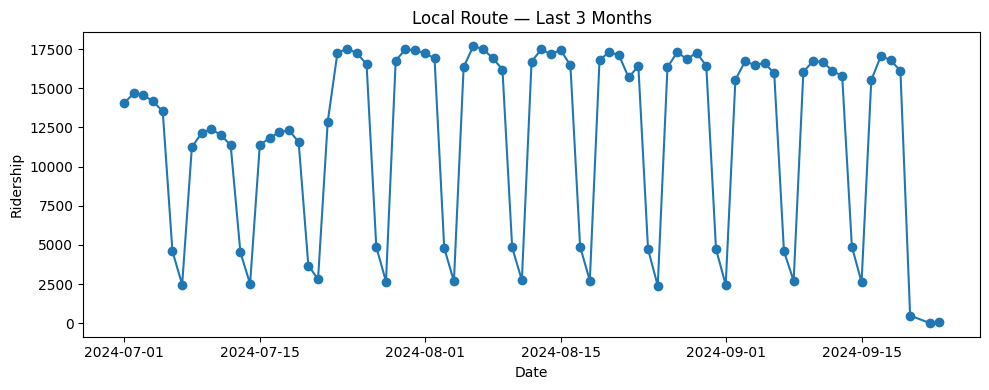

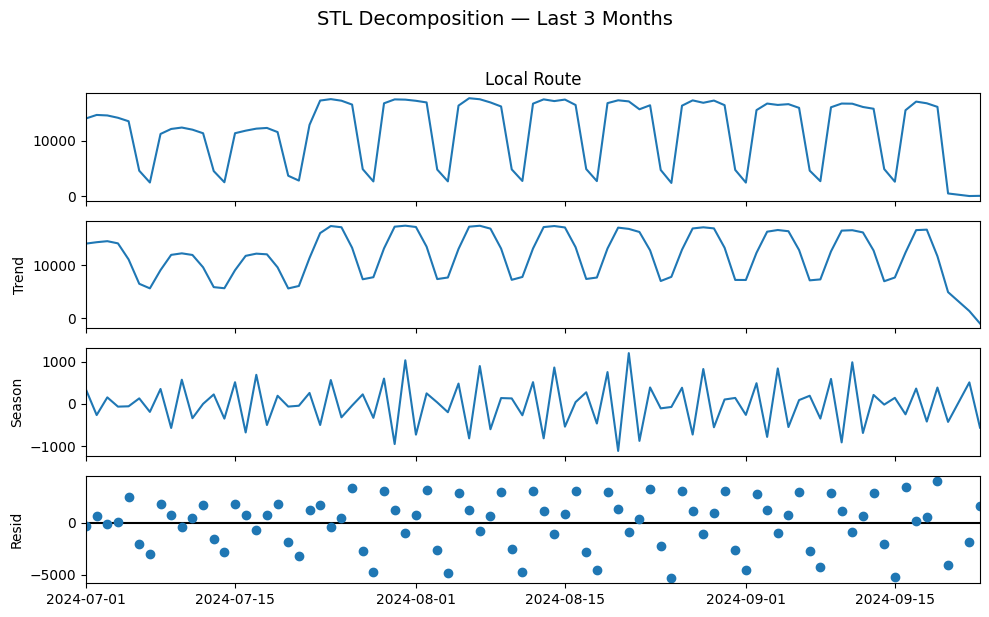

STL Components Summary:
count       84.000000
mean     11972.573321
std       4359.727622
min       -963.583576
25%       7680.580537
50%      12773.136860
75%      16409.129483
max      17424.551121
Name: trend, dtype: float64
count      84.000000
mean       -1.098231
std       524.278904
min     -1106.395058
25%      -416.080452
50%        19.975024
75%       368.362589
max      1198.308027
Name: season, dtype: float64
count      84.000000
mean      -32.367948
std      2469.455029
min     -5346.176247
25%     -1917.972966
50%       563.793548
75%      1767.150346
max      4061.196561
Name: resid, dtype: float64


In [236]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# ✅ Step 1 — Filter data for the last 3 months dynamically
df_period = df.last('3M')  # Last 3 months of data

# ✅ Step 2 — (Optional) Plot the filtered time series
plt.figure(figsize=(10, 4))
plt.plot(df_period.index, df_period['Local Route'], marker='o', linewidth=1.5)
plt.title('Local Route — Last 3 Months')
plt.xlabel('Date')
plt.ylabel('Ridership')
plt.tight_layout()
plt.show()

# ✅ Step 3 — STL decomposition
stl = STL(df_period['Local Route'], period=2, robust=True)  # period=1 because 3 months is too short for yearly seasonality
result = stl.fit()

# ✅ Step 4 — Plot the decomposition results
fig = result.plot()
fig.set_size_inches(10, 6)
plt.suptitle('STL Decomposition — Last 3 Months', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# ✅ Step 5 — Print summary of components
print("STL Components Summary:")
print(result.trend.describe())
print(result.seasonal.describe())
print(result.resid.describe())


Staionary Check

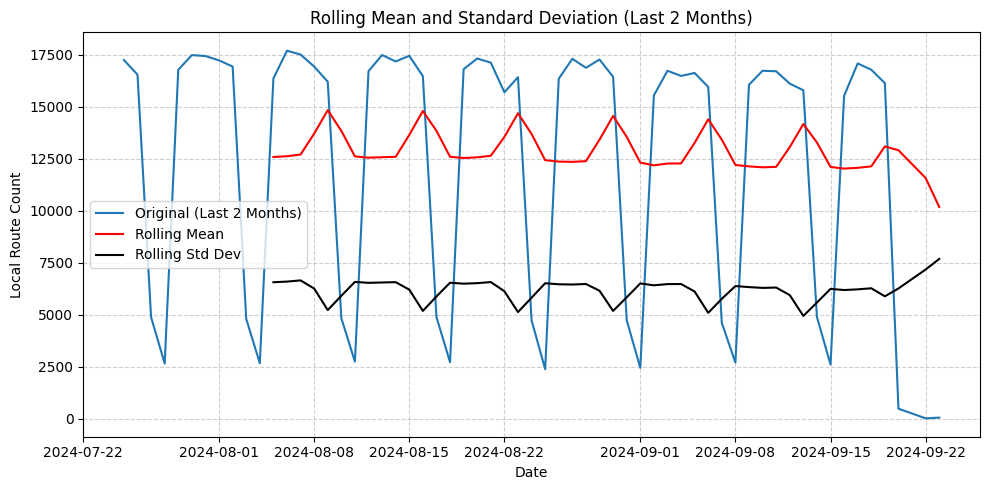

In [148]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the time window (last 2 months)
last_months_start = df.index[-1] - pd.Timedelta(days=60)
df_recent = df[df.index >= last_months_start]

# Calculate rolling stats (12-period rolling window)
rolling_mean = df_recent['Local Route'].rolling(window=12).mean()
rolling_std = df_recent['Local Route'].rolling(window=12).std()

# Plot rolling mean and std for recent data
plt.figure(figsize=(10, 5))
plt.plot(df_recent['Local Route'], label='Original (Last 2 Months)')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std Dev')
plt.legend()
plt.title('Rolling Mean and Standard Deviation (Last 2 Months)')
plt.xlabel('Date')
plt.ylabel('Local Route Count')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [108]:
df.head()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2019-07-08,13078,9442,422,18848,0,0.0
2019-07-09,13835,10550,455,19862,0,1.0
2019-07-10,13856,10066,421,19502,0,1.0
2019-07-11,12776,9536,421,19204,0,0.0
2019-07-12,12614,9413,344,18057,0,1.0


In [109]:
from statsmodels.tsa.stattools import adfuller

def adf_test(x):
    res = adfuller(x.dropna())
    return {'adf_stat': res[0], 'pvalue': res[1], 'usedlag': res[2], 'nobs': res[3]}


In [110]:
print("ADF Test Results for 'Local Route':")
adf_test(df['Local Route'])

ADF Test Results for 'Local Route':


{'adf_stat': np.float64(-4.657852449798642),
 'pvalue': np.float64(0.0001009095825168457),
 'usedlag': 14,
 'nobs': 1873}

In [111]:
print("ADF Test Results for 'Light Rail':")
adf_test(df['Light Rail'])

ADF Test Results for 'Light Rail':


{'adf_stat': np.float64(-3.5506349373740558),
 'pvalue': np.float64(0.006778017393844767),
 'usedlag': 21,
 'nobs': 1866}

In [112]:
print("ADF Test Results for 'Peak Service':")
adf_test(df['Peak Service'])

ADF Test Results for 'Peak Service':


{'adf_stat': np.float64(-3.476093566952559),
 'pvalue': np.float64(0.008622712522564859),
 'usedlag': 26,
 'nobs': 1861}

In [113]:
print("ADF Test Results for 'Rapid Route':")
adf_test(df['Rapid Route'])

ADF Test Results for 'Rapid Route':


{'adf_stat': np.float64(-3.7792410352220234),
 'pvalue': np.float64(0.0031269922339800995),
 'usedlag': 14,
 'nobs': 1873}

In [114]:
print("ADF Test Results for 'School':")
adf_test(df['School'])

ADF Test Results for 'School':


{'adf_stat': np.float64(-7.136964787092128),
 'pvalue': np.float64(3.401272413704835e-10),
 'usedlag': 25,
 'nobs': 1862}

In [125]:
df.head()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2019-07-08,13078,9442,422,18848,0,0.0
2019-07-09,13835,10550,455,19862,0,1.0
2019-07-10,13856,10066,421,19502,0,1.0
2019-07-11,12776,9536,421,19204,0,0.0
2019-07-12,12614,9413,344,18057,0,1.0


Anomoly Detection

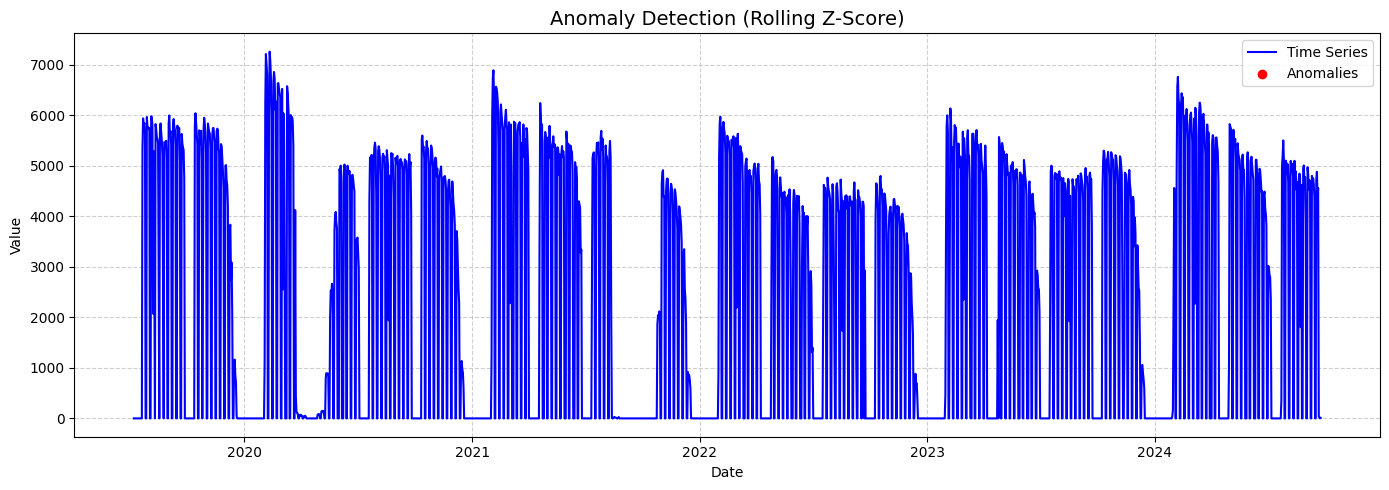

In [132]:
# Choose the column to analyze
series = df['School']

# Rolling window size (tune as needed)
period = 7  # e.g., one week for daily data

# --- Rolling mean and std without interpolation ---
roll_mean = series.rolling(window=period*2, min_periods=1, center=True).mean()
roll_std = series.rolling(window=period*2, min_periods=1, center=True).std().replace(0, np.nan)

# --- Z-score calculation ---
zscore = (series - roll_mean) / roll_std

# --- Detect anomalies ---
anomalies = zscore[abs(zscore) > 3]

# --- Visualization ---
plt.figure(figsize=(14, 5))
plt.plot(series, label='Time Series', color='blue')
plt.scatter(anomalies.index, series.loc[anomalies.index], color='red', label='Anomalies')
plt.title('Anomaly Detection (Rolling Z-Score)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

## Model Development

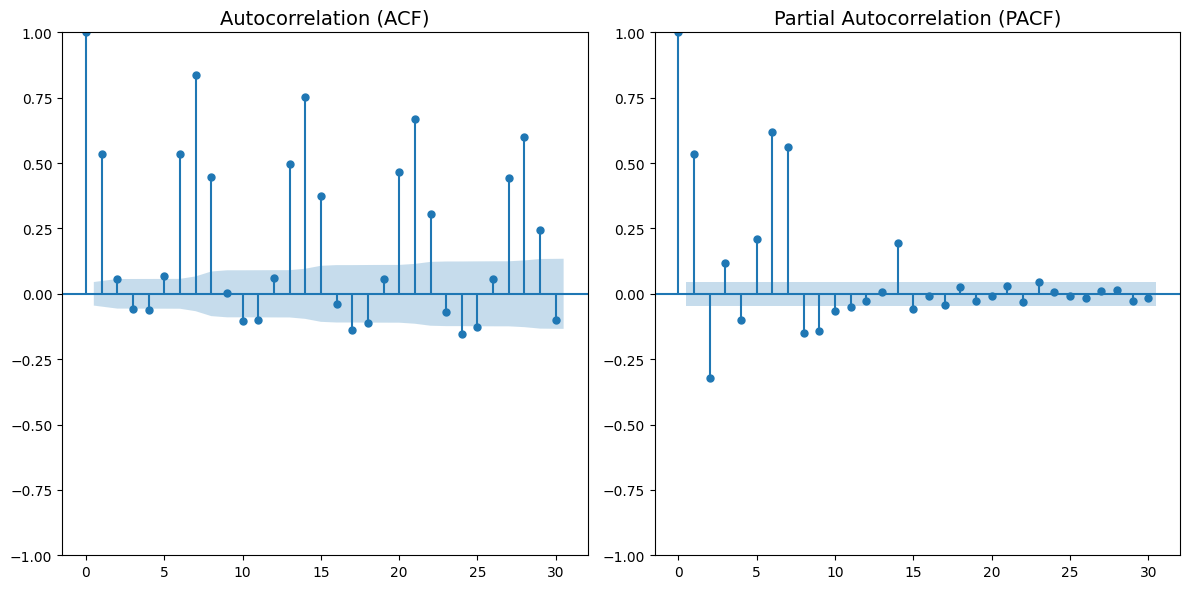

In [133]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Select the column to analyze
series = df['Local Route']

# --- Plot ACF and PACF ---
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(series, lags=30, ax=plt.gca())
plt.title('Autocorrelation (ACF)', fontsize=14)

plt.subplot(1, 2, 2)
plot_pacf(series, lags=30, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation (PACF)', fontsize=14)

plt.tight_layout()
plt.show()

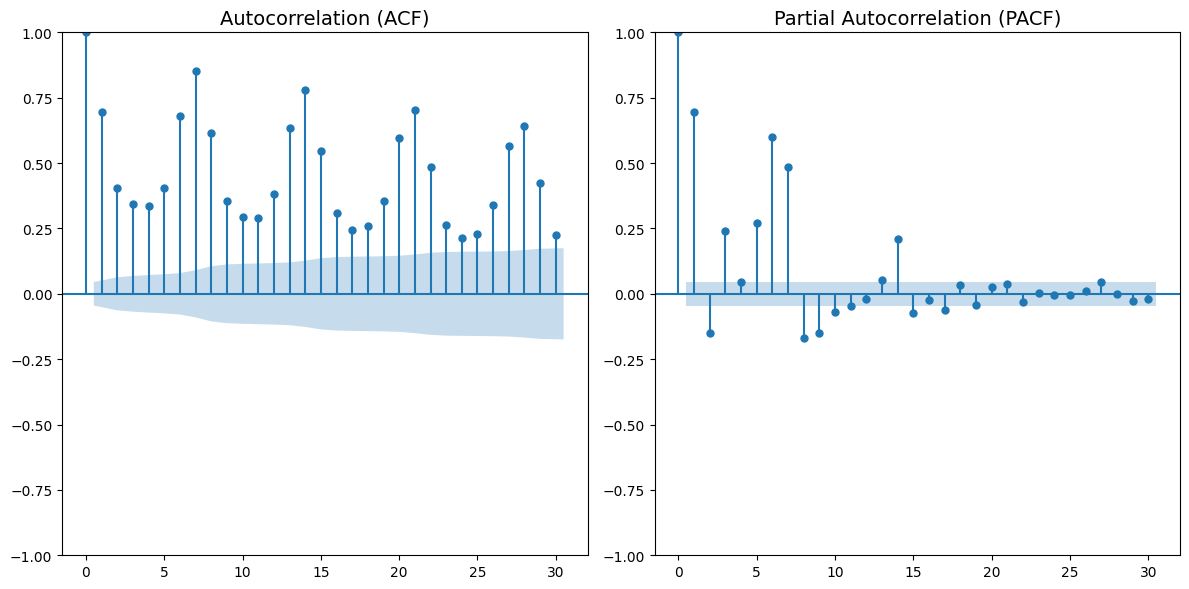

In [161]:
# Select the column to analyze
series = df['Light Rail']

# --- Plot ACF and PACF ---
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(series, lags=30, ax=plt.gca())
plt.title('Autocorrelation (ACF)', fontsize=14)

plt.subplot(1, 2, 2)
plot_pacf(series, lags=30, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation (PACF)', fontsize=14)

plt.tight_layout()
plt.show()

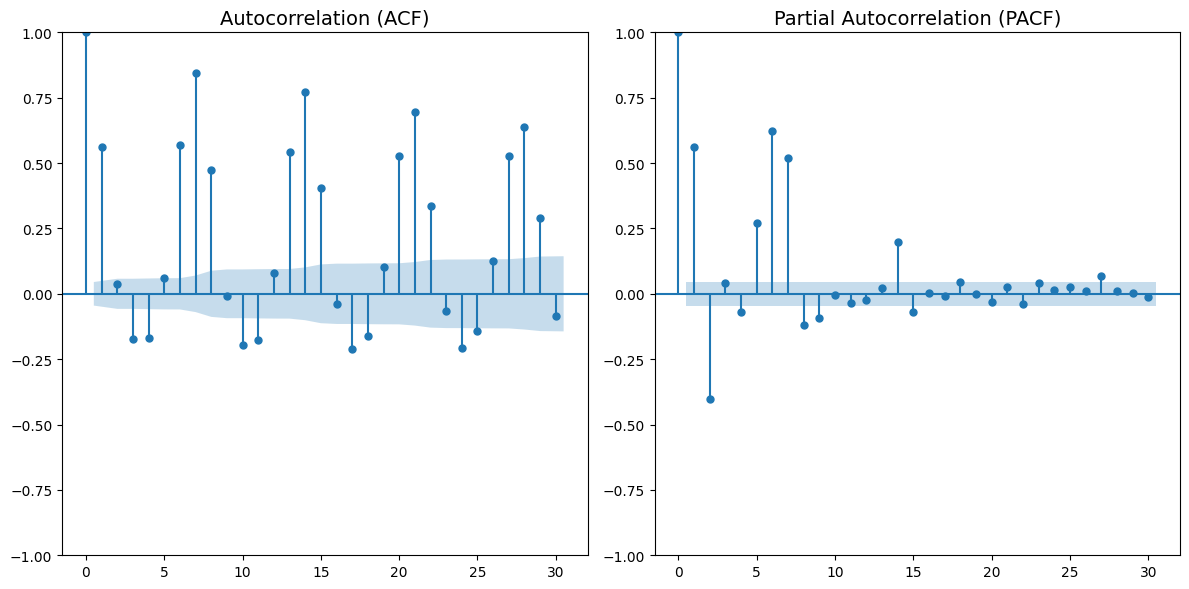

In [134]:
# Select the column to analyze
series = df['Peak Service']

# --- Plot ACF and PACF ---
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(series, lags=30, ax=plt.gca())
plt.title('Autocorrelation (ACF)', fontsize=14)

plt.subplot(1, 2, 2)
plot_pacf(series, lags=30, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation (PACF)', fontsize=14)

plt.tight_layout()
plt.show()

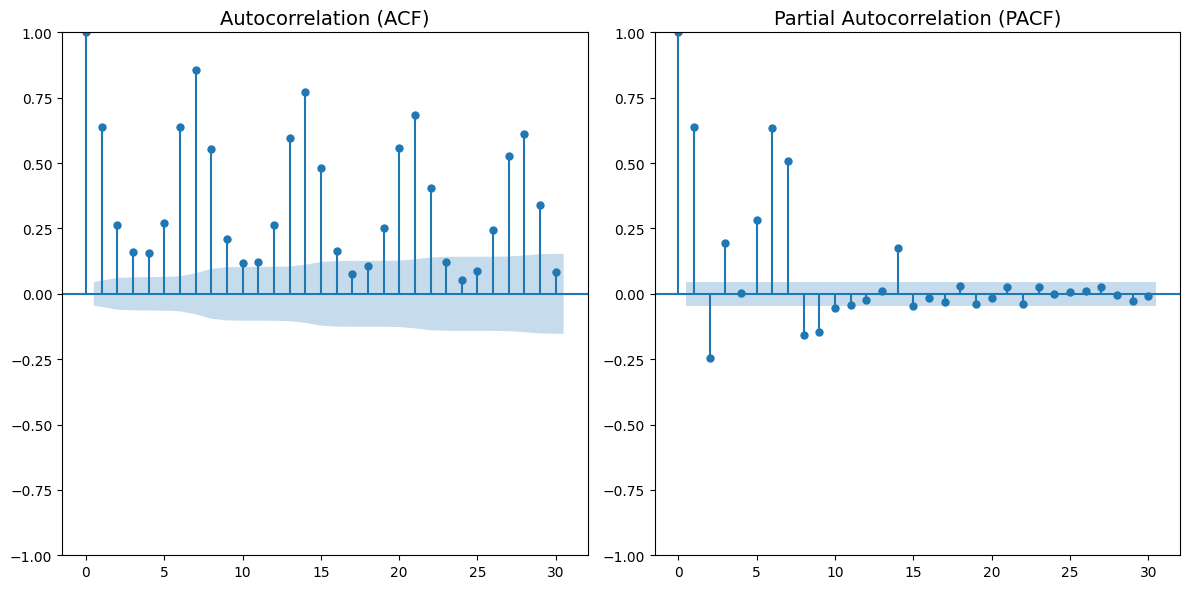

In [136]:
# Select the column to analyze
series = df['Rapid Route']

# --- Plot ACF and PACF ---
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(series, lags=30, ax=plt.gca())
plt.title('Autocorrelation (ACF)', fontsize=14)

plt.subplot(1, 2, 2)
plot_pacf(series, lags=30, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation (PACF)', fontsize=14)

plt.tight_layout()
plt.show()

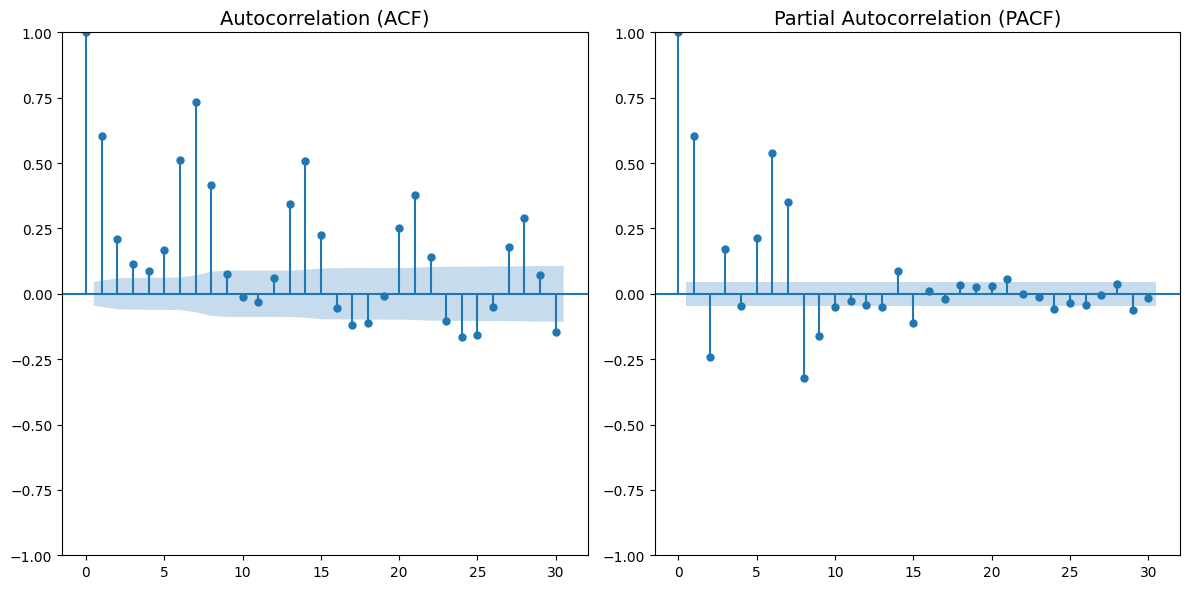

In [137]:
# Select the column to analyze
series = df['School']

# --- Plot ACF and PACF ---
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(series, lags=30, ax=plt.gca())
plt.title('Autocorrelation (ACF)', fontsize=14)

plt.subplot(1, 2, 2)
plot_pacf(series, lags=30, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation (PACF)', fontsize=14)

plt.tight_layout()
plt.show()

Local Route

In [248]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Select one time series
series = df['Local Route'].dropna()

# Replace (p,d,q) with values suggested by ACF/PACF plots
p, d, q = 10, 0, 1  

LR_model = ARIMA(series, order=(p, d, q))
model_fit = LR_model.fit()

# Summary
print(model_fit.summary())

# ---- Calculate MAE on in-sample predictions ----
pred = model_fit.fittedvalues
mae = mean_absolute_error(series[d:], pred[d:])  # ignore first differenced values if d>0
print(f"\n📊 Mean Absolute Error (MAE): {mae:.2f}")


                               SARIMAX Results                                
Dep. Variable:            Local Route   No. Observations:                 1888
Model:                ARIMA(10, 0, 1)   Log Likelihood              -17770.957
Date:                Tue, 04 Nov 2025   AIC                          35567.915
Time:                        11:32:16   BIC                          35639.977
Sample:                             0   HQIC                         35594.452
                               - 1888                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9895.9317    728.005     13.593      0.000    8469.069    1.13e+04
ar.L1          0.7043      0.225      3.133      0.002       0.264       1.145
ar.L2         -0.1811      0.083     -2.190      0.0

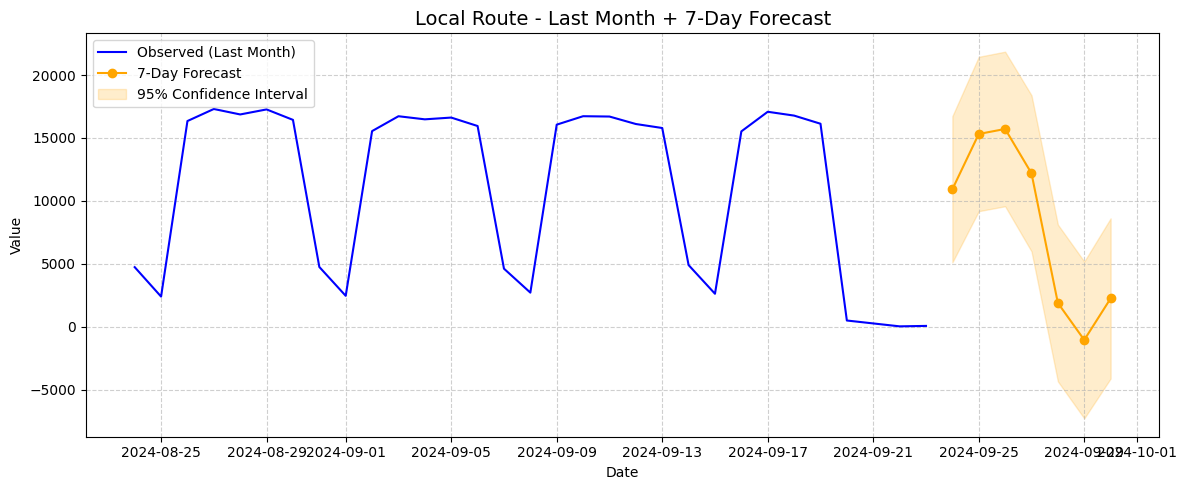

In [249]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the forecast horizon
forecast_steps = 7
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

# Create correct future date index
last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Select only the last month of data
last_month_start = df.index[-1] - pd.Timedelta(days=30)
df_last_month = df[df.index >= last_month_start]

# Plot
plt.figure(figsize=(12,5))
plt.plot(df_last_month.index, df_last_month['Local Route'], label='Observed (Last Month)', color='blue')
plt.plot(forecast_index, forecast.predicted_mean, label='7-Day Forecast', color='orange', marker='o')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1],
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.title('Local Route - Last Month + 7-Day Forecast', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Light Rail

In [250]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Select one time series
series = df['Light Rail'].dropna()

# Replace (p,d,q) with values suggested by ACF/PACF plots
p, d, q = 10, 0, 1  

LR_model = ARIMA(series, order=(p, d, q))
model_fit = LR_model.fit()

# Summary
print(model_fit.summary())

# ---- Calculate MAE on in-sample predictions ----
pred = model_fit.fittedvalues
mae = mean_absolute_error(series[d:], pred[d:])  # ignore first differenced values if d>0
print(f"\n📊 Mean Absolute Error (MAE): {mae:.2f}")



                               SARIMAX Results                                
Dep. Variable:             Light Rail   No. Observations:                 1888
Model:                ARIMA(10, 0, 1)   Log Likelihood              -16469.834
Date:                Tue, 04 Nov 2025   AIC                          32965.668
Time:                        11:32:36   BIC                          33037.731
Sample:                             0   HQIC                         32992.205
                               - 1888                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7201.8872    760.813      9.466      0.000    5710.722    8693.052
ar.L1          0.7016      0.217      3.226      0.001       0.275       1.128
ar.L2         -0.1631      0.094     -1.744      0.0

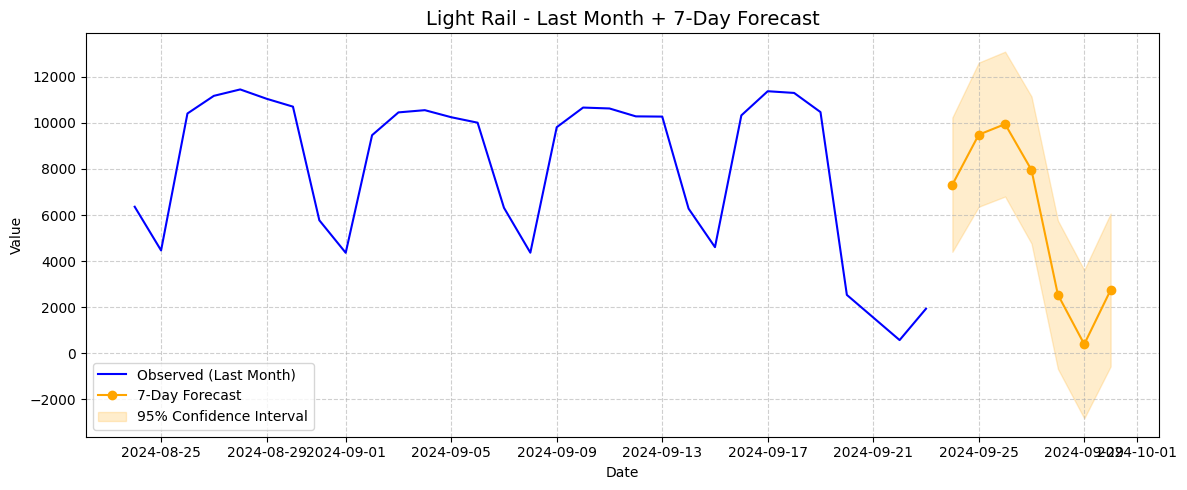

In [251]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the forecast horizon
forecast_steps = 7
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

# Create correct future date index
last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Select only the last month of data
last_month_start = df.index[-1] - pd.Timedelta(days=30)
df_last_month = df[df.index >= last_month_start]

# Plot
plt.figure(figsize=(12,5))
plt.plot(df_last_month.index, df_last_month['Light Rail'], label='Observed (Last Month)', color='blue')
plt.plot(forecast_index, forecast.predicted_mean, label='7-Day Forecast', color='orange', marker='o')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1],
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.title('Light Rail - Last Month + 7-Day Forecast', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Peak Service

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Select one time series
series = df['Peak Service'].dropna()

# Replace (p,d,q) with values suggested by ACF/PACF plots
p, d, q = 3, 1, 1

PS_model = ARIMA(series, order=(p, d, q))
model_fit = PS_model.fit()

# Summary
print(model_fit.summary())

# ---- Calculate MAE on in-sample predictions ----
pred = model_fit.fittedvalues
mae = mean_absolute_error(series[d:], pred[d:])  
print(f"\n📊 Mean Absolute Error (MAE): {mae:.2f}")



                               SARIMAX Results                                
Dep. Variable:           Peak Service   No. Observations:                 1888
Model:                 ARIMA(3, 1, 1)   Log Likelihood              -11488.643
Date:                Tue, 04 Nov 2025   AIC                          22987.286
Time:                        10:44:23   BIC                          23015.000
Sample:                             0   HQIC                         22997.492
                               - 1888                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5500      0.027     20.122      0.000       0.496       0.604
ar.L2         -0.3889      0.026    -15.029      0.000      -0.440      -0.338
ar.L3         -0.2088      0.026     -8.072      0.0

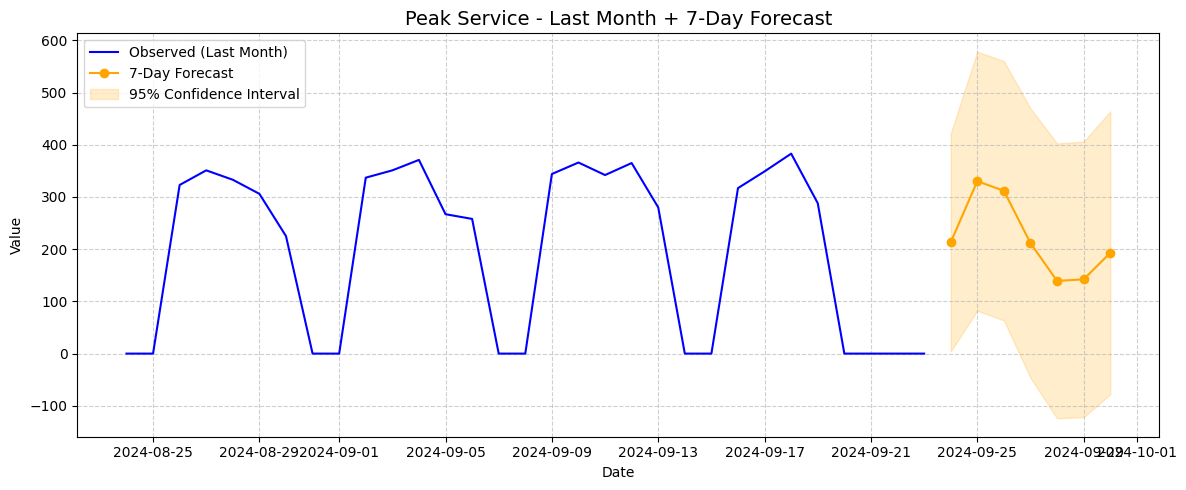

In [225]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the forecast horizon
forecast_steps = 7
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

# Create correct future date index
last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Select only the last month of data
last_month_start = df.index[-1] - pd.Timedelta(days=30)
df_last_month = df[df.index >= last_month_start]

# Plot
plt.figure(figsize=(12,5))
plt.plot(df_last_month.index, df_last_month['Peak Service'], label='Observed (Last Month)', color='blue')
plt.plot(forecast_index, forecast.predicted_mean, label='7-Day Forecast', color='orange', marker='o')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1],
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.title('Peak Service - Last Month + 7-Day Forecast', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Rapid Route

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Select one time series
series = df['Rapid Route'].dropna()

# Non-seasonal ARIMA orders based on ACF/PACF
p, d, q = 4, 0, 10

# Seasonal parameters 
P, D, Q, m = 1, 1, 1, 12

# Define the SARIMA model
RR_model = SARIMAX(
    series,
    order=(p, d, q),
    seasonal_order=(P, D, Q, m),
    enforce_stationarity=False,
    enforce_invertibility=False
)
model_fit = RR_model.fit()

# Summary
print(model_fit.summary())

# ---- Calculate MAE on in-sample predictions ----
pred = model_fit.fittedvalues
mae = mean_absolute_error(series[d:], pred[d:])  
print(f"\n📊 Mean Absolute Error (MAE): {mae:.2f}")



                                       SARIMAX Results                                       
Dep. Variable:                           Rapid Route   No. Observations:                 1888
Model:             SARIMAX(4, 0, 10)x(1, 1, [1], 12)   Log Likelihood              -17706.665
Date:                               Tue, 04 Nov 2025   AIC                          35447.331
Time:                                       11:24:33   BIC                          35541.249
Sample:                                            0   HQIC                         35481.949
                                              - 1888                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7567      0.021     36.747      0.000       0.716       0.797
ar.L2      

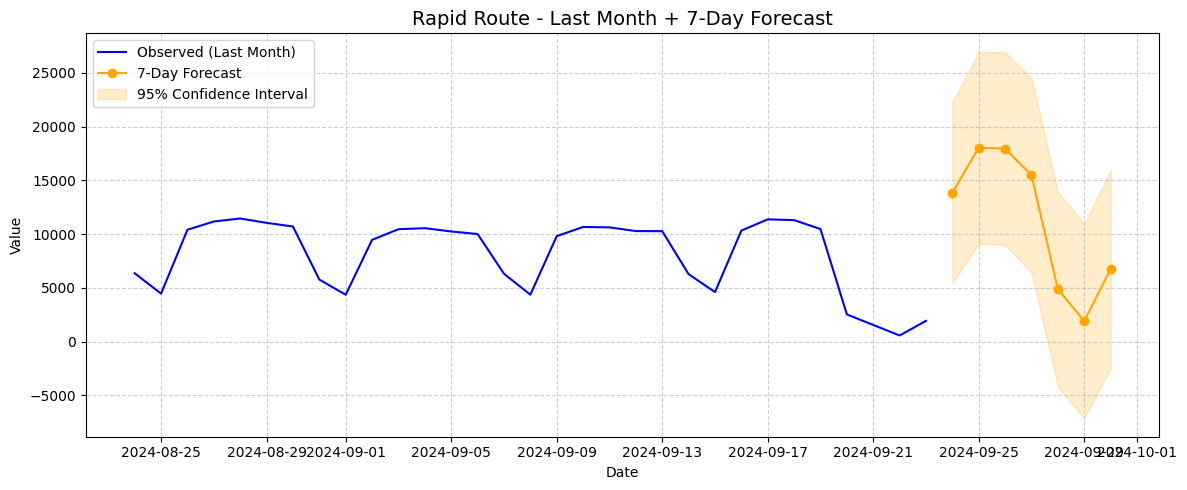

In [241]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the forecast horizon
forecast_steps = 7
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

# Create correct future date index
last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Select only the last month of data
last_month_start = df.index[-1] - pd.Timedelta(days=30)
df_last_month = df[df.index >= last_month_start]

# Plot
plt.figure(figsize=(12,5))
plt.plot(df_last_month.index, df_last_month['Light Rail'], label='Observed (Last Month)', color='blue')
plt.plot(forecast_index, forecast.predicted_mean, label='7-Day Forecast', color='orange', marker='o')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1],
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.title('Rapid Route - Last Month + 7-Day Forecast', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


School

In [230]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Select one time series
series = df['School'].dropna()

# Replace (p,d,q) with values suggested by ACF/PACF plots
p, d, q = 4, 1, 8

LR_model = ARIMA(series, order=(p, d, q))
model_fit = LR_model.fit()

# Summary
print(model_fit.summary())

# ---- Calculate MAE on in-sample predictions ----
pred = model_fit.fittedvalues
mae = mean_absolute_error(series[d:], pred[d:])  # ignore first differenced values if d>0
print(f"\n📊 Mean Absolute Error (MAE): {mae:.2f}")



                               SARIMAX Results                                
Dep. Variable:                 School   No. Observations:                 1888
Model:                 ARIMA(4, 1, 8)   Log Likelihood              -16370.922
Date:                Tue, 04 Nov 2025   AIC                          32767.844
Time:                        10:46:35   BIC                          32839.900
Sample:                             0   HQIC                         32794.379
                               - 1888                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7564      0.020     37.485      0.000       0.717       0.796
ar.L2         -1.3576      0.023    -59.961      0.000      -1.402      -1.313
ar.L3          0.7069      0.024     29.778      0.0

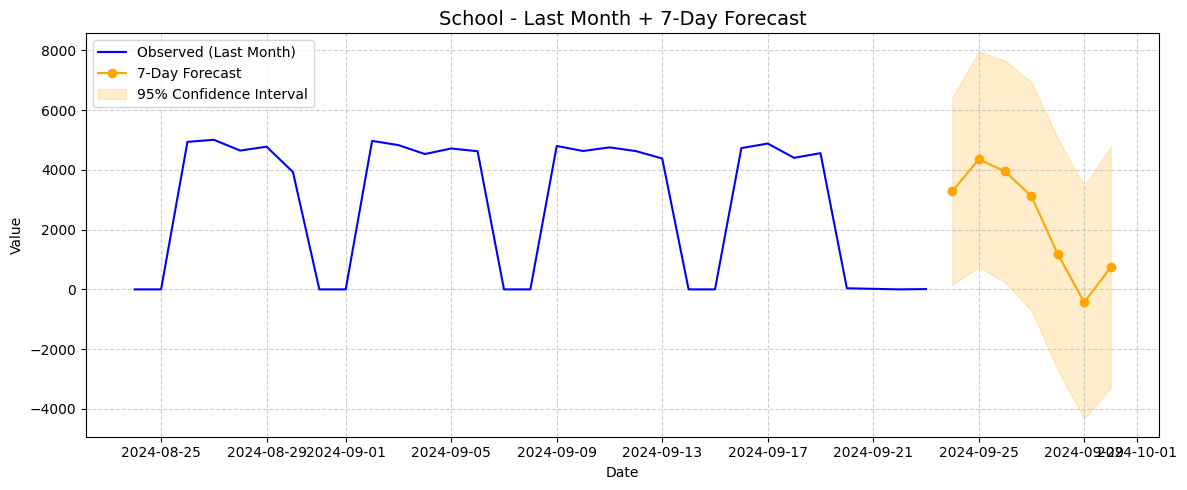

In [231]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the forecast horizon
forecast_steps = 7
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

# Create correct future date index
last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Select only the last month of data
last_month_start = df.index[-1] - pd.Timedelta(days=30)
df_last_month = df[df.index >= last_month_start]

# Plot
plt.figure(figsize=(12,5))
plt.plot(df_last_month.index, df_last_month['School'], label='Observed (Last Month)', color='blue')
plt.plot(forecast_index, forecast.predicted_mean, label='7-Day Forecast', color='orange', marker='o')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1],
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.title('School - Last Month + 7-Day Forecast', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


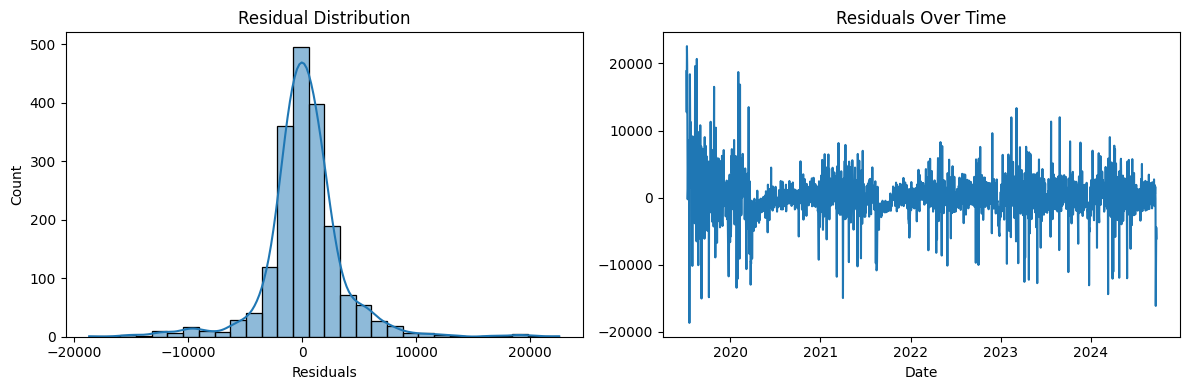

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot residuals to check randomness
residuals = model_fit.resid

fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(residuals, bins=30, kde=True, ax=axes[0])
axes[0].set_title('Residual Distribution')
axes[0].set_xlabel('Residuals')

axes[1].plot(residuals)
axes[1].set_title('Residuals Over Time')
axes[1].set_xlabel('Date')

plt.tight_layout()
plt.show()

# A good model → residuals are centered around 0 and show no clear pattern.
